# Graph theory - BBGAgora
On this notebook we will be able to get a first touch with [NetworkX](https://networkx.org/) (Python package for graphs) and [Neo4j](https://neo4j.com/)
(a graph database). Also, we will see some graphs concepts that can be useful in case on some data analysis. 

We will use *OV.txt* file, somantic mutation data file, extracted and modified from [pyNBS: a Python implementation for network-based stratification of tumor mutations](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6084608/) paper. 

Described as follows:

__Sample__ | __Gene__

TCGA-04-1331 | ABHD13

TCGA-04-1331 | ACTRT1

TCGA-04-1331 | AHNAK2

In [99]:
# Install & import 
!pip install networkx
#!pip install matplotlib
#!pip install scipy
import csv
import networkx as nx
import matplotlib.pyplot as plt

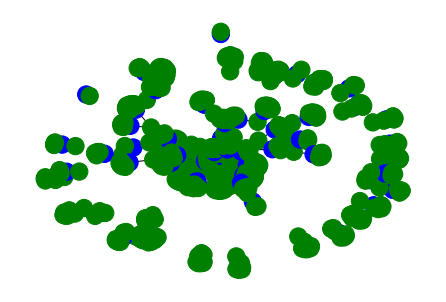

In [70]:
color_map = []
G = nx.Graph()
with open('OV.txt', 'r') as file:
    reader = csv.reader(file, delimiter = '\t')
    for i, row in enumerate(reader):
        if row[0] not in G:
            color_map.append("blue")
        G.add_node(row[0], type="sample")
        if row[1] not in G:
            color_map.append("green")
        G.add_node(row[1], type="gene")
        G.add_edge(row[0], row[1])

nx.draw(G, node_color=color_map)

In [98]:
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

Number of nodes: 611
Number of edges: 582


### Degree
Number of edges that incident of the vertex. 

With that we can calculate: Which gene interacts the most? 

In [100]:
print("Counting the degree of each gene.")
attributes = nx.get_node_attributes(G, "type")
degrees_by_gene = [(n, G.degree(n)) for n in G.nodes() if attributes[n] == "gene"]
result = sorted(degrees_by_gene, key=lambda x: x[1])
result.reverse()

print(f"The genes that appears most in the samples are (from a list of {len(result)} genes):")
for i in range(5):
    print(f"Gene: {result[i][0]}, Interactions: {result[i][1]}")

Counting the degree of each gene.
The genes that appears most (from a list of 536 genes):
Gene: TP53, Interactions: 16
Gene: TTN, Interactions: 4
Gene: ANKRD30A, Interactions: 3
Gene: ZFHX4, Interactions: 3
Gene: ACACB, Interactions: 3


In [106]:
#print(f"radius: {nx.radius(G)}")
#print(f"diameter: {nx.diameter(G)}")
#print(f"eccentricity: {nx.eccentricity(G)}")
#print(f"center: {nx.center(G)}")
print(f"periphery: {nx.periphery(G)}")
print(f"density: {nx.density(G)}")

NetworkXError: Found infinite path length because the graph is not connected